# 6.8 Exercises

## Exercise 8

In this exercise, we will generate simulated data, and will then use this data to perform best subset selection.

### Step (a)

> Use the `rnorm()` function to generate a predictor `X` of length n = 100, as well as a noise vector $\epsilon$ of length n = 100.

In [96]:
x=rnorm(100)
errors=rnorm(100)

### Step (b)

> Generate a response vector Y of length n = 100 according to the model $Y=\beta_0+\beta_1X+\beta_2{X^2}+\beta_3{X^3}+\epsilon$, where $\beta_0, \beta_1, \beta_2,$ and $\beta_3$ are constants of your choice.

In [97]:
y = 3 + 1.5*x + 3*x^2 + 2.5*x^3 + errors

### Step (c)

> Use the regsubsets() function to perform best subset selection in order to choose the best model containing the predictors $X, X^2, . . . , X^{10}$. What is the best model obtained according to $C_p$, BIC, and adjusted $R^2$? Show some plots to provide evidence for your answer, and report the coefficients of the best model obtained. Note you will need to use the `data.frame()` function to create a single data set containing both `X` and `Y`.

In [98]:
library(leaps)
df = data.frame(x, y)
x.bestsub = regsubsets(y~poly(x, 10, raw=T), data=df, nvmax=10)
bestsub.summary = summary(x.bestsub)
bestsub.summary

Subset selection object
Call: regsubsets.formula(y ~ poly(x, 10, raw = T), data = df, nvmax = 10)
10 Variables  (and intercept)
                       Forced in Forced out
poly(x, 10, raw = T)1      FALSE      FALSE
poly(x, 10, raw = T)2      FALSE      FALSE
poly(x, 10, raw = T)3      FALSE      FALSE
poly(x, 10, raw = T)4      FALSE      FALSE
poly(x, 10, raw = T)5      FALSE      FALSE
poly(x, 10, raw = T)6      FALSE      FALSE
poly(x, 10, raw = T)7      FALSE      FALSE
poly(x, 10, raw = T)8      FALSE      FALSE
poly(x, 10, raw = T)9      FALSE      FALSE
poly(x, 10, raw = T)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 poly(x, 10, raw = T)3
1  ( 1 )  " "                   " "                   "*"                  
2  ( 1 )  " "                   "*"                   "*"                  
3  ( 1 )  "*"                   "*"                   "*"                  
4  ( 1 )  "*"       

The above summary describes best models based on different subsets. For example, the first is the best model containing one variable, 2nd is the best subset of 2-variable models.

Next, we will use $C_p$, $BIC$ and adjusted $R^2$ to determine the best model. Let's plot all models for these indicators.

In [99]:
print(names(bestsub.summary))

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"   


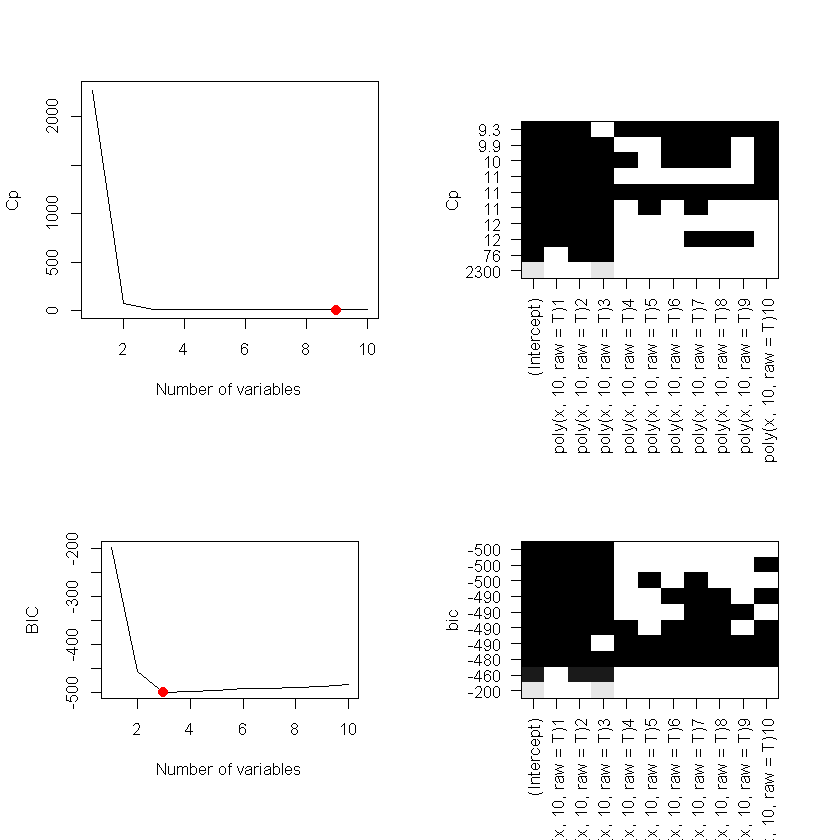

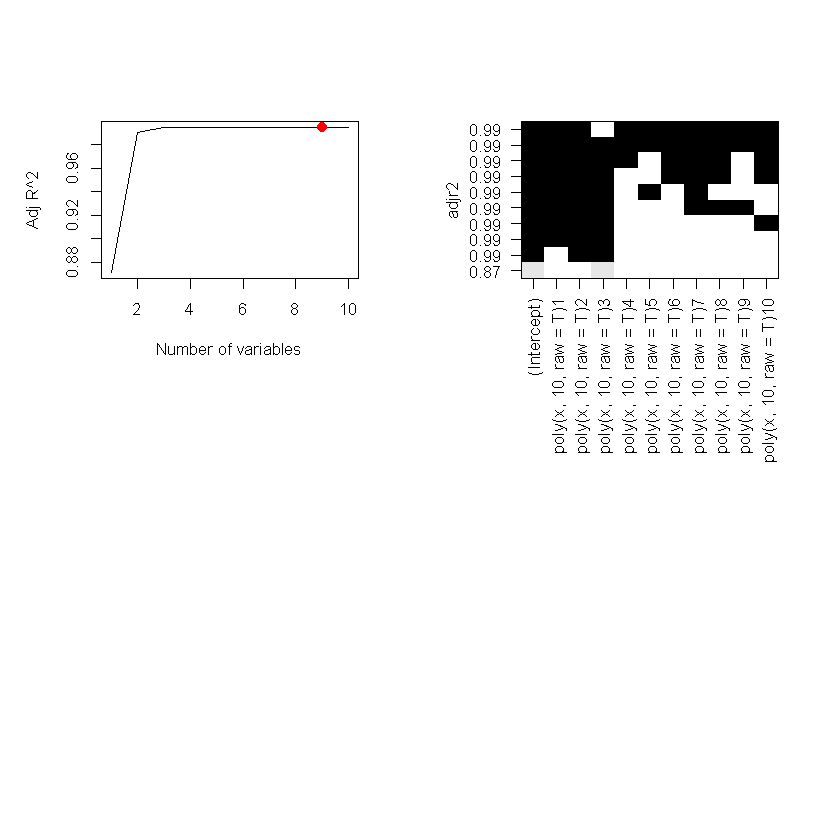

In [100]:
par(mfrow=c(2,2))
plot(bestsub.summary$cp, xlab="Number of variables", ylab="Cp", type="l")
min_adjr2 = which.min(bestsub.summary$cp)
points(min_adjr2, bestsub.summary$adjr2[min_adjr2], col="red", cex=2, pch=20)
plot(x.bestsub, scale="Cp")

plot(bestsub.summary$bic, xlab="Number of variables", ylab="BIC", type="l")
min_bic = which.min(bestsub.summary$bic)
points(min_bic, bestsub.summary$bic[min_bic], col="red", cex=2, pch=20)
plot(x.bestsub, scale="bic")

plot(bestsub.summary$adjr2, xlab="Number of variables", ylab="Adj R^2", type="l")
max_adjr2 = which.max(bestsub.summary$adjr2)
points(max_adjr2, bestsub.summary$adjr2[max_adjr2], col="red", cex=2, pch=20)
plot(x.bestsub, scale="adjr2")

We can observe based on $C_p$, $BIC$, $R^2$ that the most optimal number of variable is $3$. Both BIC and $C_p$ indicate three and with $R^2$ the difference between 3 and 7 is very small. The coefficients of the best model are:

In [101]:
print(coef(x.bestsub, 3))

          (Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 
             3.000876              1.348334              2.998608 
poly(x, 10, raw = T)3 
             2.566697 


### Step (d)

> Repeat (c), using forward stepwise selection and also using backwards stepwise selection. How does your answer compare to the results in (c)?

In [102]:
x.fwd = regsubsets(y~poly(x, 10, raw=T), data=df, nvmax=10, method="forward")
xfwd.summary = summary(x.fwd)
xfwd.summary

Subset selection object
Call: regsubsets.formula(y ~ poly(x, 10, raw = T), data = df, nvmax = 10, 
    method = "forward")
10 Variables  (and intercept)
                       Forced in Forced out
poly(x, 10, raw = T)1      FALSE      FALSE
poly(x, 10, raw = T)2      FALSE      FALSE
poly(x, 10, raw = T)3      FALSE      FALSE
poly(x, 10, raw = T)4      FALSE      FALSE
poly(x, 10, raw = T)5      FALSE      FALSE
poly(x, 10, raw = T)6      FALSE      FALSE
poly(x, 10, raw = T)7      FALSE      FALSE
poly(x, 10, raw = T)8      FALSE      FALSE
poly(x, 10, raw = T)9      FALSE      FALSE
poly(x, 10, raw = T)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 poly(x, 10, raw = T)3
1  ( 1 )  " "                   " "                   "*"                  
2  ( 1 )  " "                   "*"                   "*"                  
3  ( 1 )  "*"                   "*"                   "*"                 

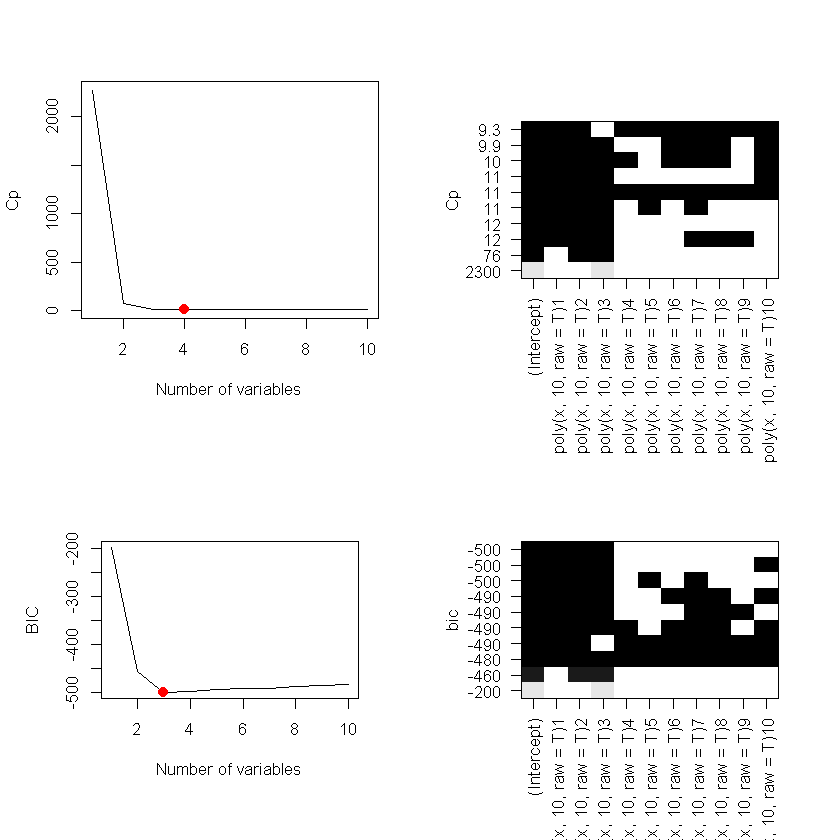

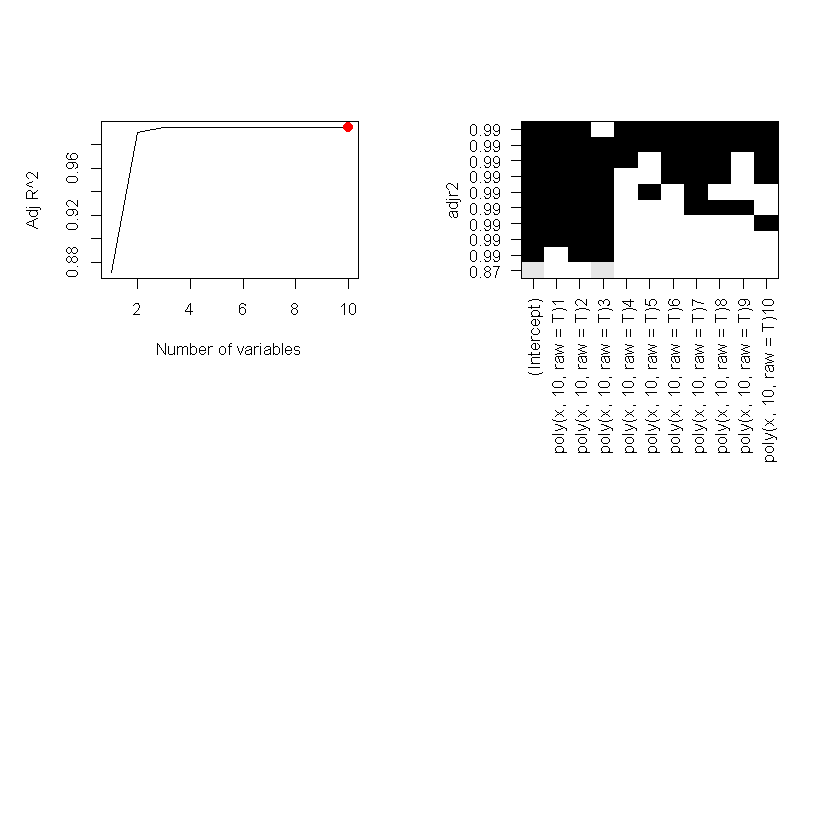

In [103]:
par(mfrow=c(2,2))
plot(xfwd.summary$cp, xlab="Number of variables", ylab="Cp", type="l")
min_cp = which.min(xfwd.summary$cp)
points(min_cp, xfwd.summary$cp[min_cp], col="red", cex=2, pch=20)
plot(x.bestsub, scale="Cp")

plot(xfwd.summary$bic, xlab="Number of variables", ylab="BIC", type="l")
min_bic = which.min(xfwd.summary$bic)
points(min_bic, xfwd.summary$bic[min_bic], col="red", cex=2, pch=20)
plot(x.bestsub, scale="bic")

plot(xfwd.summary$adjr2, xlab="Number of variables", ylab="Adj R^2", type="l")
max_adjr2 = which.max(xfwd.summary$adjr2)
points(max_adjr2, xfwd.summary$adjr2[max_adjr2], col="red", cex=2, pch=20)
plot(x.bestsub, scale="adjr2")

We can observe that the results are the same as in the best subset selection.

### Step (e)

> Now fit a lasso model to the simulated data, again using $X, X^2, . . . , X^{10}$ as predictors. Use cross-validation to select the optimal value of λ. Create plots of the cross-validation error as a function of λ. Report the resulting coefficient estimates, and discuss the results obtained.

In [104]:
library(glmnet)

# first convert to model matrix
xm=model.matrix(y~poly(x, 10, raw=T), data=df)[,-1]
ym=df$y

# lasso
x.lasso = cv.glmnet(xm, ym, alpha=1)

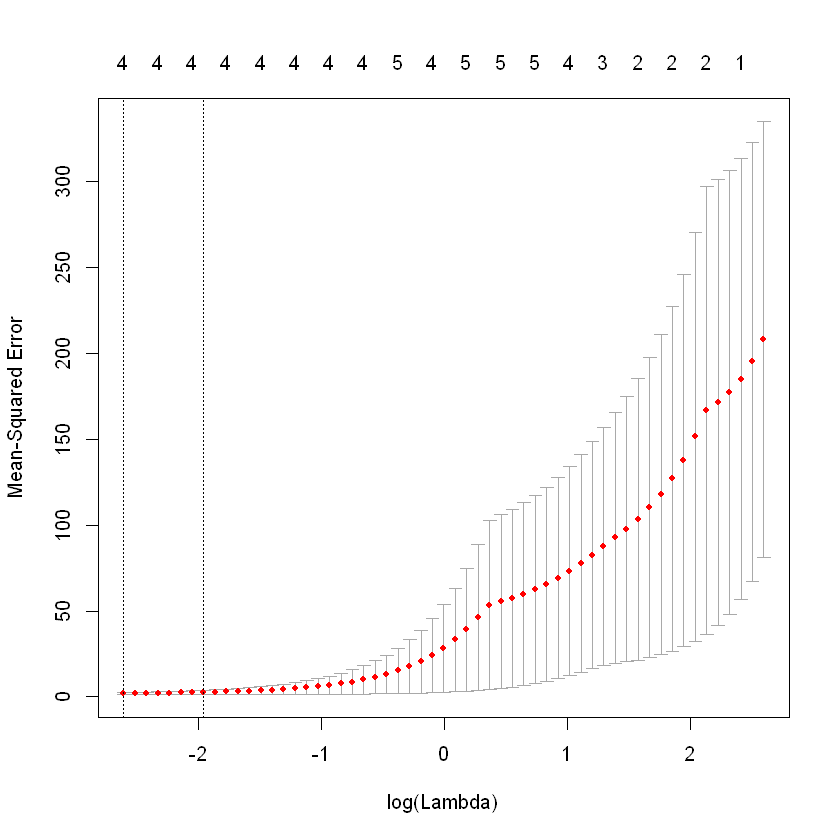

In [105]:
plot(x.lasso)

In [106]:
bestlambda = x.lasso$lambda.min
bestlambda

[1] 0.07360134

The lowest lambda is 0.06 and if we use this lambda the following are the coefficients.

In [107]:
lasso.coef=predict(x.lasso, type="coefficients", s=bestlambda)
print(lasso.coef)

11 x 1 sparse Matrix of class "dgCMatrix"
                                  1
(Intercept)            3.161653e+00
poly(x, 10, raw = T)1  1.471435e+00
poly(x, 10, raw = T)2  2.788295e+00
poly(x, 10, raw = T)3  2.481083e+00
poly(x, 10, raw = T)4  .           
poly(x, 10, raw = T)5  .           
poly(x, 10, raw = T)6  .           
poly(x, 10, raw = T)7  .           
poly(x, 10, raw = T)8  .           
poly(x, 10, raw = T)9  .           
poly(x, 10, raw = T)10 4.358012e-05


The final coefficients are actually very close to the real coefficients, which indicates that the method is generating very good results.

### Step (f)

> Now generate a response vector $Y$ according to the model $Y=\beta_0+\beta_7X^7+\epsilon$ and perform best subset selection and the lasso. Discuss the results obtained

In [108]:
df$y = df$x+df$x^7+errors

# best subset selection
x.bestsub = regsubsets(y~poly(x, 10, raw=T), data=df, nvmax=10)
bestsub.summary = summary(x.bestsub)
bestsub.summary

Subset selection object
Call: regsubsets.formula(y ~ poly(x, 10, raw = T), data = df, nvmax = 10)
10 Variables  (and intercept)
                       Forced in Forced out
poly(x, 10, raw = T)1      FALSE      FALSE
poly(x, 10, raw = T)2      FALSE      FALSE
poly(x, 10, raw = T)3      FALSE      FALSE
poly(x, 10, raw = T)4      FALSE      FALSE
poly(x, 10, raw = T)5      FALSE      FALSE
poly(x, 10, raw = T)6      FALSE      FALSE
poly(x, 10, raw = T)7      FALSE      FALSE
poly(x, 10, raw = T)8      FALSE      FALSE
poly(x, 10, raw = T)9      FALSE      FALSE
poly(x, 10, raw = T)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 poly(x, 10, raw = T)3
1  ( 1 )  " "                   " "                   " "                  
2  ( 1 )  "*"                   " "                   " "                  
3  ( 1 )  "*"                   "*"                   " "                  
4  ( 1 )  "*"       

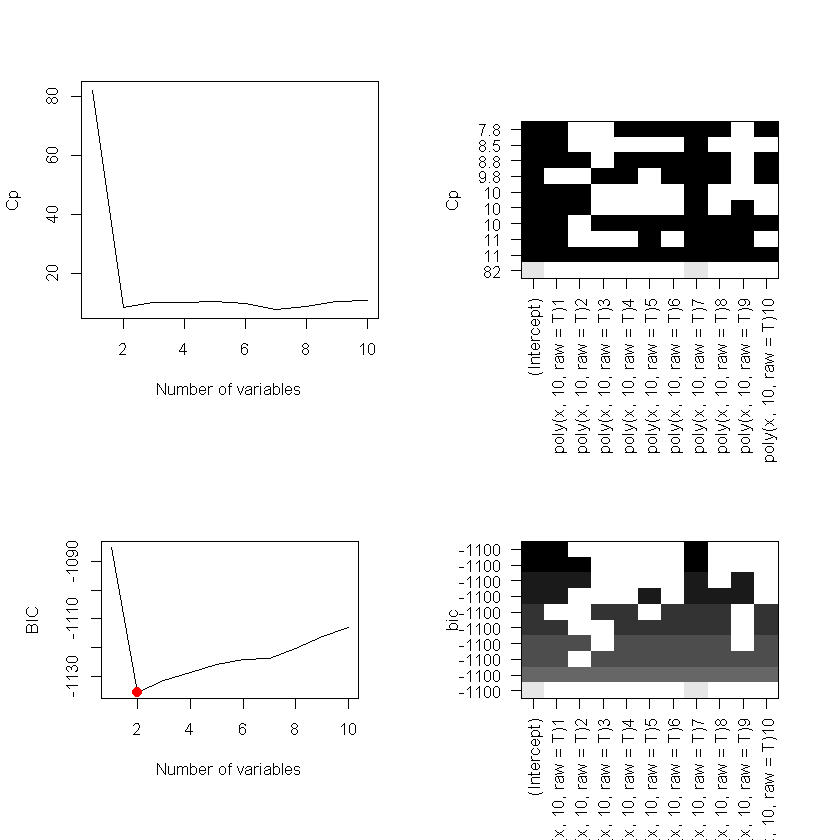

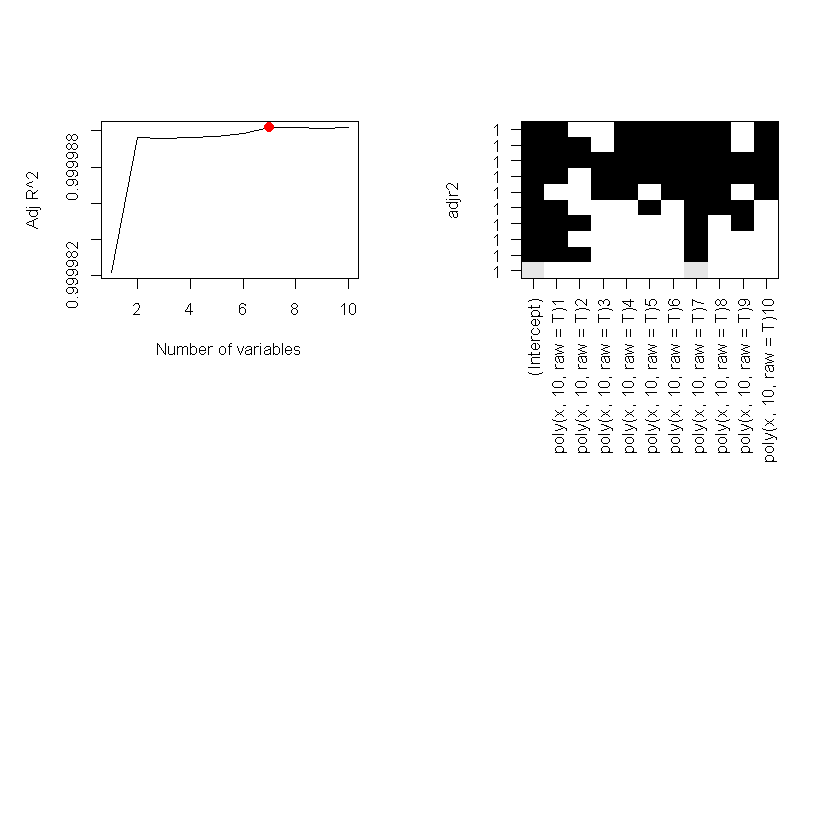

In [109]:
par(mfrow=c(2,2))
plot(bestsub.summary$cp, xlab="Number of variables", ylab="Cp", type="l")
min_adjr2 = which.min(bestsub.summary$cp)
points(min_adjr2, bestsub.summary$adjr2[min_adjr2], col="red", cex=2, pch=20)
plot(x.bestsub, scale="Cp")

plot(bestsub.summary$bic, xlab="Number of variables", ylab="BIC", type="l")
min_bic = which.min(bestsub.summary$bic)
points(min_bic, bestsub.summary$bic[min_bic], col="red", cex=2, pch=20)
plot(x.bestsub, scale="bic")

plot(bestsub.summary$adjr2, xlab="Number of variables", ylab="Adj R^2", type="l")
max_adjr2 = which.max(bestsub.summary$adjr2)
points(max_adjr2, bestsub.summary$adjr2[max_adjr2], col="red", cex=2, pch=20)
plot(x.bestsub, scale="adjr2")

Best subset selection provides interesting results. We can see that the lowest $C_p$ value and BIC occurs at 2 variables.

Next, let's perform lasso.

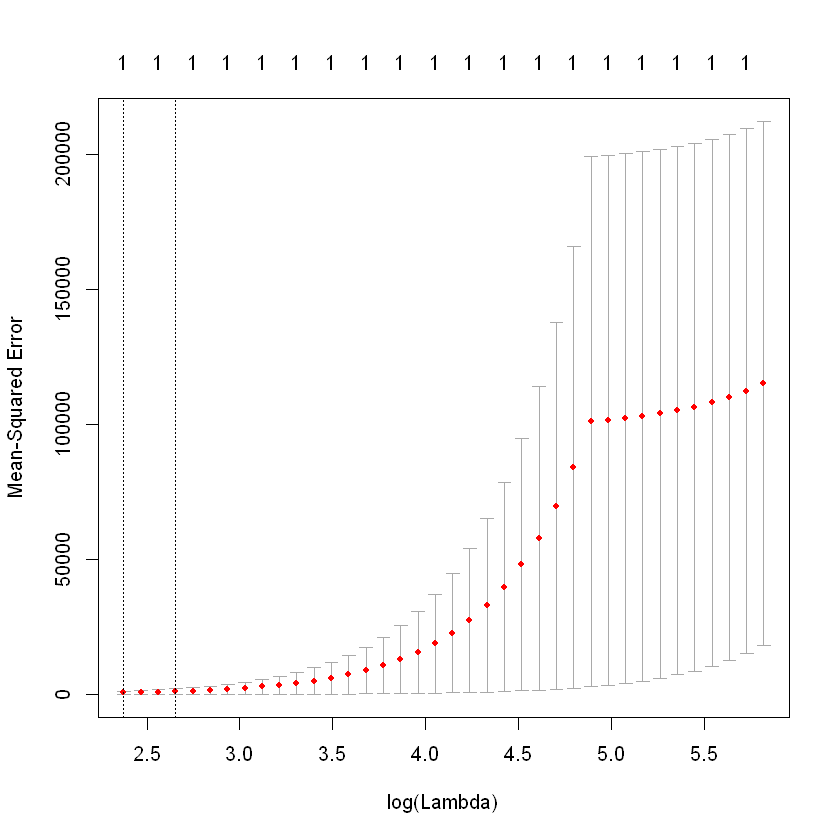

In [110]:
# first convert to model matrix
xm=model.matrix(y~poly(x, 10, raw=T), data=df)[, -1]
ym=df$y

# lasso
x.lasso = cv.glmnet(xm, ym, alpha=1)
plot(x.lasso)

In [111]:
bestlambda = x.lasso$lambda.min
bestlambda

[1] 10.76291

In [112]:
lasso.coef=predict(x.lasso, type="coefficients", s=bestlambda)
print(lasso.coef)

11 x 1 sparse Matrix of class "dgCMatrix"
                               1
(Intercept)            0.1840825
poly(x, 10, raw = T)1  .        
poly(x, 10, raw = T)2  .        
poly(x, 10, raw = T)3  .        
poly(x, 10, raw = T)4  .        
poly(x, 10, raw = T)5  .        
poly(x, 10, raw = T)6  .        
poly(x, 10, raw = T)7  0.9702126
poly(x, 10, raw = T)8  .        
poly(x, 10, raw = T)9  .        
poly(x, 10, raw = T)10 .        


We can observe from the results that with best subset selection all the variables are still present, meaning their coefficients are non-zero. Lasso performs very well here because it also performs feature elimination. Despite that its still a bit further from the true model, because lasso kept 2 more features even though one of those $x.9$ has a near zero coefficient.

## Question 9

In this exercise, we will predict the number of applications received using the other variables in the `College` data set.

### Step (a)

> Split the data set into a training set and a test set.

In [113]:
library(ISLR)
train = sample(c(TRUE, FALSE), nrow(College), rep=TRUE, prob=c(0.7, 0.3))
test = (!train)
table(train)

train
FALSE  TRUE 
  241   536 

### Step (b)

> Fit a linear model using least squares on the training set, and report the test error obtained

In [114]:
set.seed(200)
lm.fit = lm(Apps~., data=College[train,])
pred = predict(lm.fit, College[test, ])
lm.error = mean((College[test, "Apps"] - pred)^2)
paste("Test Error for Linear Model is ", round(lm.error, 2))

[1] "Test Error for Linear Model is  1410035.62"

### Step (c)

> Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

[1] "Best lambda is  415.62"

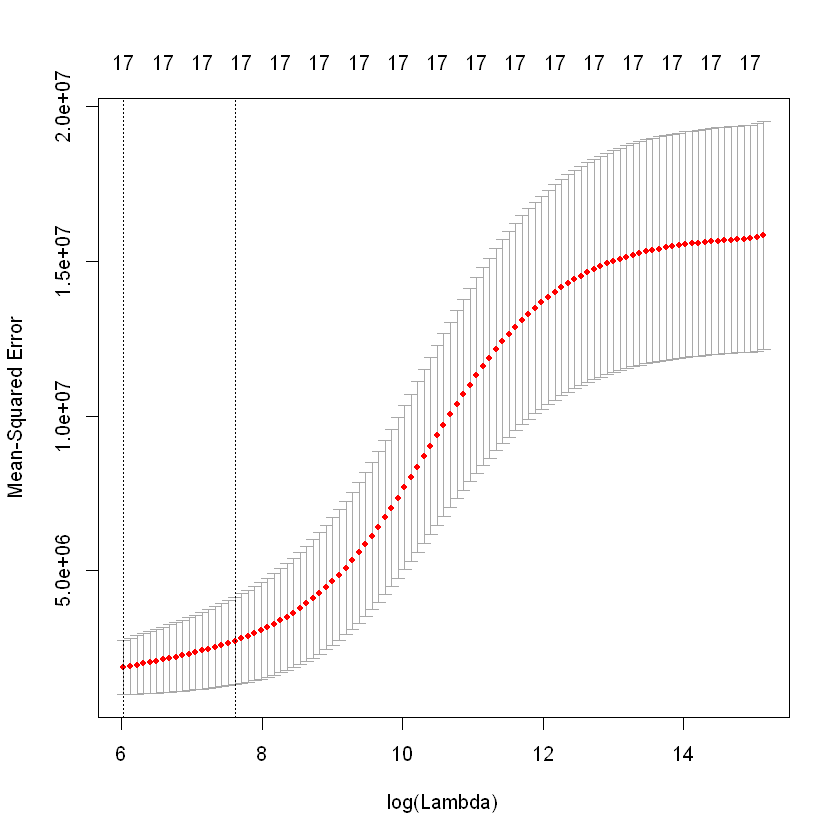

In [115]:
library(leaps)
set.seed(1)
# conver to model matrix for Ridge
x=model.matrix(Apps~., College)[,-1]
y=College$Apps

# fit ridge
ridge.fit = cv.glmnet(x[train,], y[train], alpha=0)
ridge.bestlamda = ridge.fit$lambda.min

plot(ridge.fit)
paste("Best lambda is ", round(ridge.bestlamda, 2))

In [116]:
ridge.pred=predict(ridge.fit, s=ridge.bestlamda, newx=x[test,])
ridge.error = mean((ridge.pred-y[test])^2)
paste("Test Error for CV Ridge Model is ", round(ridge.error, 2))

[1] "Test Error for CV Ridge Model is  1314969.71"

### Step (d)

> Fit a lasso model on the training set, with λ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [117]:
set.seed(1)
lasso.fit = cv.glmnet(x[train,], y[train], alpha=1, scale=TRUE)
lasso.bestlamda = lasso.fit$lambda.min
plot(lasso.fit)
paste("Best lambda is ", lasso.bestlamda)

ERROR: Error in glmnet(x, y, weights = weights, offset = offset, lambda = lambda, : unused argument (scale = TRUE)


In [ ]:
lasso.pred = predict(lasso.fit, s=lasso.bestlamda, newx=x[test,])
lasso.error = mean((lasso.pred-y[test])^2)
paste("Test Error for CV Lasso Model is ", round(lasso.error, 2))

In [ ]:
lasso.model=glmnet(x[train,], y[train], alpha=1, lambda=lasso.bestlamda)
lasso.coef=predict(lasso.model, type="coefficients")
print(lasso.coef)

There are total 14 non-zero coefficients.

### Step (e)

> Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

In [ ]:
library(pls)
set.seed(1)
pcr.fit=pcr(Apps~., data=College, subset=train, scale=TRUE, validation="CV")
summary(pcr.fit)

In [ ]:
validationplot(pcr.fit, val.type="MSEP")

We can see the smallest cross-validation error occurs when M=17, which is basically performing least squares regression. We can observe that 16 components is also a similar value as to M=17. Next let's find test error with 16 components.

In [ ]:
pcr.pred=predict(pcr.fit, x[test,], ncomp=16)
pcrerror16 = mean((pcr.pred-y[test])^2)
paste("Test Error of PCR for M=16 is", pcrerror16)

In [ ]:
pcr.pred=predict(pcr.fit, x[test,], ncomp=17)
pcrerror17 = mean((pcr.pred-y[test])^2)
paste("Test Error of PCR for M=17 is", pcrerror17)

### Step (f)

> Fit a PLS model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

In [ ]:
set.seed(1)
pls.fit=plsr(Apps~., data=College, subset=train, scale=TRUE, validation="CV")
summary(pls.fit)

In [ ]:
validationplot(pls.fit, val.type="MSEP")

The Partial Least Squares (PLS) shows that after 7 components the test error doesn't change as much. We will try 7 components as well as 17, since there seems to be very tiny gradual decrease in test error.

In [ ]:
pls.pred=predict(pls.fit, x[test,], ncomp=7)
plserror7 = mean((pls.pred-y[test])^2)
paste("Test error of PLS for M=7 is", round(plserror7, 2))

In [ ]:
pls.pred=predict(pls.fit, x[test,], ncomp=17)
plserror17 = mean((pls.pred-y[test])^2)
paste("Test error of PLS for M=17 is", round(plserror17, 2))

### Step (g)

> Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

To summarize the results above, here are the test errors for each model

In [ ]:
paste("Test Error for Linear Model is ", round(lm.error, 2))
paste("Test Error for CV Lasso Model is ", round(lasso.error, 2))
paste("Test Error for CV Ridge Model is ", round(ridge.error, 2))
paste("Test Error of PCR for M=16 is", pcrerror16)
paste("Test Error of PCR for M=17 is", pcrerror17)
paste("Test error of PLS for M=7 is", round(plserror7, 2))
paste("Test error of PLS for M=17 is", round(plserror17, 2))

We can observe that the lowest Test Error is for Ridge Model.

## Question 11

We will now try to predict per capita crime rate in the `Boston` data set.

In [ ]:
library(MASS)
print(names(Boston))

In [ ]:
summary(Boston$crim)

We have total of 13 features and we will be predicting per capita crime rate `crim`. Average crime rate is 3.6 with minimum being almost 0 and maximum 89.

Next, we split the dataset into train and test set with proportion of 70%, 30%

In [ ]:
train = sample(c(TRUE, FALSE), nrow(Boston), rep=TRUE, prob=c(0.7, 0.3))
test = (!train)
table(train)

### Step (a)

> Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR. Present and discuss results for the approaches that you consider.

#### Best Subset Selection

Let's first perform best subset selection

In [ ]:
regfit.full=regsubsets(crim~., data=Boston, nvmax=13)
reg.summary=summary(regfit.full)
reg.summary

In [ ]:
par(mfrow=c(2,2))
plot(reg.summary$cp, xlab="Number of variables", ylab="Cp", type="l")
min_cp = which.min(reg.summary$cp)
points(min_cp, reg.summary$cp[min_cp], col="red", cex=2, pch=20)
plot(regfit.full, scale="Cp")

plot(reg.summary$bic, xlab="Number of variables", ylab="BIC", type="l")
min_bic = which.min(reg.summary$bic)
points(min_bic, reg.summary$bic[min_bic], col="red", cex=2, pch=20)
plot(regfit.full, scale="bic")

plot(reg.summary$adjr2, xlab="Number of variables", ylab="Adj R^2", type="l")
max_adjr2 = which.max(reg.summary$adjr2)
points(max_adjr2, reg.summary$adjr2[max_adjr2], col="red", cex=2, pch=20)
plot(regfit.full, scale="adjr2")

The visualizations provide mixed results, $C_p$ tells us that the best is 8 variables, BIC - 4 variables and Adjusted $R^2$ 9 variables.

#### Linear Model (OLS)

First, let's try a simple ordinary least squares. We will use ten fold cross validation as well.

In [ ]:
set.seed(200)

# fit linear model
lm.fit = lm(crim~., data=Boston[train,])

# make predictions on test data
pred = predict(lm.fit, Boston[test, ])

# calculate error
lm.error = mean((Boston[test, "crim"] - pred)^2)
paste("Test Error for Linear Model is ", round(lm.error, 2))

#### Ridge Regression

Next, we perform ridge regression using cross validation.

In [ ]:
library(leaps)
set.seed(200)

# conver to model matrix for Ridge
x=model.matrix(crim~., Boston)[,-1]
y=Boston$crim

# fit ridge
ridge.fit = cv.glmnet(x[train,], y[train], alpha=0)
ridge.bestlamda = ridge.fit$lambda.min

plot(ridge.fit)
paste("Best lambda is ", round(ridge.bestlamda, 2))

In [ ]:
ridge.pred=predict(ridge.fit, s=ridge.bestlamda, newx=x[test,])
ridge.error = mean((ridge.pred-y[test])^2)
paste("Test Error for CV Ridge Model is ", round(ridge.error, 2))

#### Lasso Regression

Next, we perform lasso regression using cross validation.

In [ ]:
set.seed(200)

# fit the model
lasso.fit = cv.glmnet(x[train,], y[train], alpha=1)

# best lambda
lasso.bestlamda = lasso.fit$lambda.min

# plot the model
plot(lasso.fit)
paste("Best lambda is ", lasso.bestlamda)

In [ ]:
lasso.pred = predict(lasso.fit, s=lasso.bestlamda, newx=x[test,])
lasso.error = mean((lasso.pred-y[test])^2)
paste("Test Error for CV Lasso Model is ", round(lasso.error, 2))

#### Principal Components Regression (PCR)

Next, we will try PCR.

In [ ]:
library(pls)
set.seed(200)
pcr.fit=pcr(crim~., data=Boston, subset=train, scale=T, validation="CV")
validationplot(pcr.fit, val.type="MSEP")

In [ ]:
pcr.pred=predict(pcr.fit, x[test,], ncomp=4)
pcrerror=mean((pcr.pred-y[test])^2)
paste("Test error of PCR for M=4 is", round(pcrerror, 2))

In [ ]:
pcr.pred=predict(pcr.fit, x[test,], ncomp=13)
pcrerror=mean((pcr.pred-y[test])^2)
paste("Test error of PCR for M=13 is", round(pcrerror, 2))

### Step (b)

> Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, crossvalidation, or some other reasonable alternative, as opposed to using training error.

In [ ]:
paste("Test Error for Linear Model is ", round(lm.error, 2))
paste("Test Error for CV Ridge Model is ", round(ridge.error, 2))
paste("Test Error for CV Lasso Model is ", round(lasso.error, 2))
paste("Test error of PCR for M=13 is", round(pcrerror, 2))

To summarize, based on the above models, we can observe that the best model is cross-validated Lasso.

### Step (c)

> Does your chosen model involve all of the features in the data set? Why or why not?

Lasso chose the model with the following variables / coefficients.

In [ ]:
lasso.coef=predict(lasso.model, type="coefficients")
print(lasso.coef)

Our lasso model contains 12 non-zero coefficients.